In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load The Data

In [4]:
df=pd.read_csv('/content/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
df.drop_duplicates()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Exploratory Data Analysis

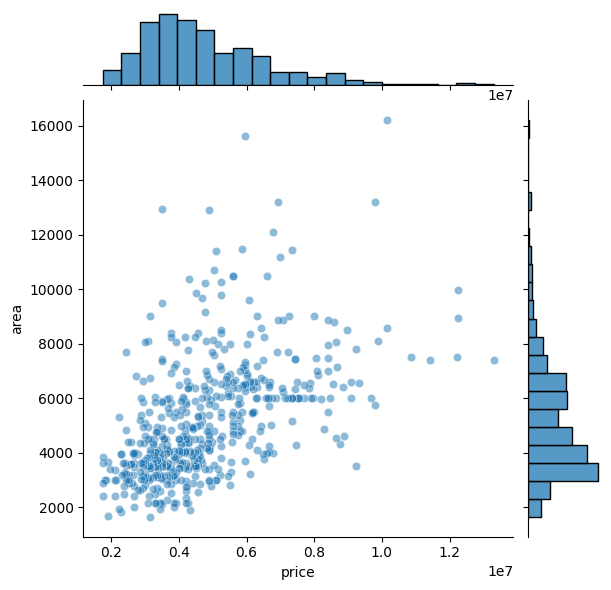

In [11]:
sns.jointplot(x='price',y='area',data=df,alpha=0.5)

In [18]:
import sklearn
from sklearn.model_selection import train_test_split

In [38]:
X = df[['area','bedrooms','bathrooms','stories','parking']]
y=df['price']

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

# Training The Model

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
ln = LinearRegression()

In [42]:
ln.fit(X_train,y_train)

LinearRegression()

In [43]:
ln.coef_

array([3.29285878e+02, 1.61077479e+05, 1.19412059e+06, 4.72530548e+05,
       3.95480372e+05])

In [44]:
coefdf = pd.DataFrame(ln.coef_,X.columns,columns = ['Coef'])
print(coefdf)

                   Coef
area       3.292859e+02
bedrooms   1.610775e+05
bathrooms  1.194121e+06
stories    4.725305e+05
parking    3.954804e+05


In [45]:
predictions = ln.predict(X_test)

<Axes: ylabel='price'>

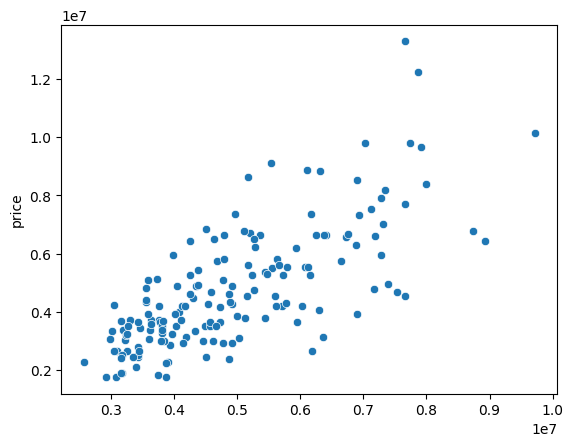

In [46]:
sns.scatterplot(x=predictions,y=y_test)

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import math

In [48]:
print("Mean Absolute Error:",mean_absolute_error(y_test,predictions))
print("Mean Squared Error:",mean_squared_error(y_test,predictions))
print("Root Mean Squared Error:",math.sqrt(mean_squared_error(y_test,predictions)))
print("R2:",r2_score(y_test,predictions))

Mean Absolute Error: 1065137.8263727794
Mean Squared Error: 2044165115591.7866
Root Mean Squared Error: 1429743.0243200304
R2: 0.5253182966980272


In [31]:
residuals = y_test - predictions

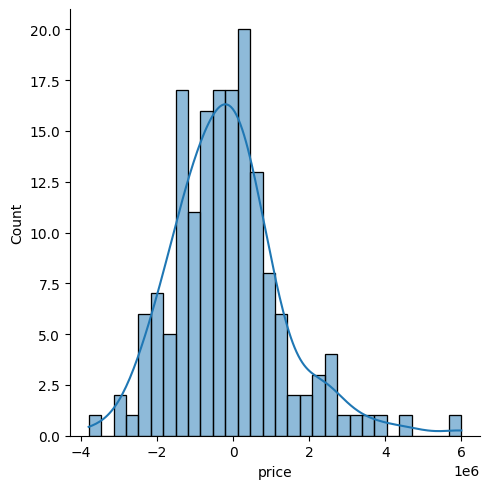

In [32]:
sns.displot(residuals,bins=30,kde=True)